<a href="https://colab.research.google.com/github/jgr11082003/CODEALPHA_DATASCIENCE/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving unemployment-in-india.zip to unemployment-in-india (2).zip
Column Names Before Cleaning:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Column Names After Cleaning:
Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

Missing Values:
Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64

Duplicate Rows:
0

First 5 Rows of the Dataset:
           Region       Date Frequency  Estimated_Unemployment_Rate_(%)  \
0  Andhra Pradesh 2019-05-3

<ipython-input-8-d7703fdf9d8e>:26: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


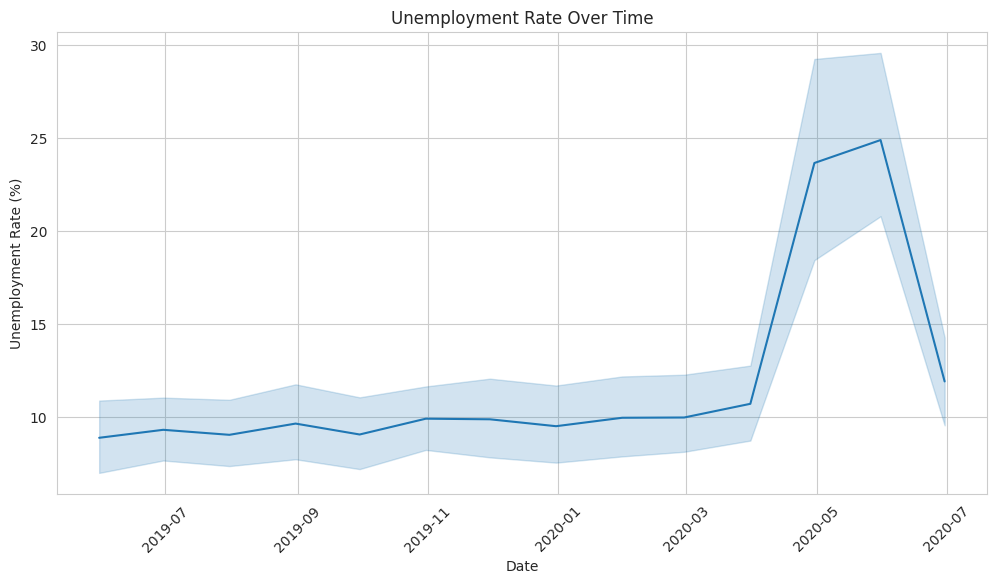

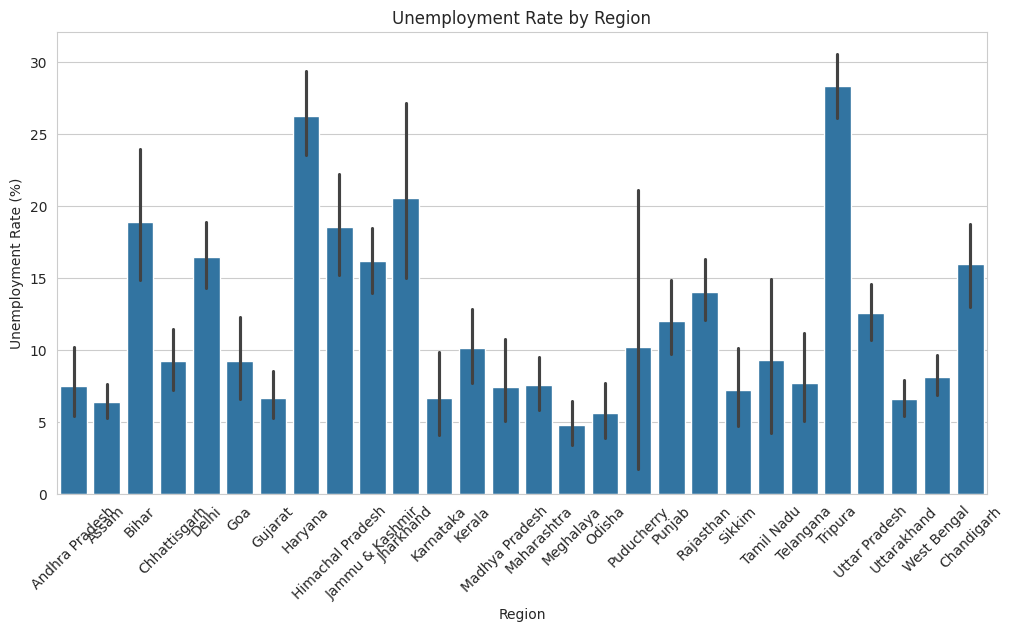

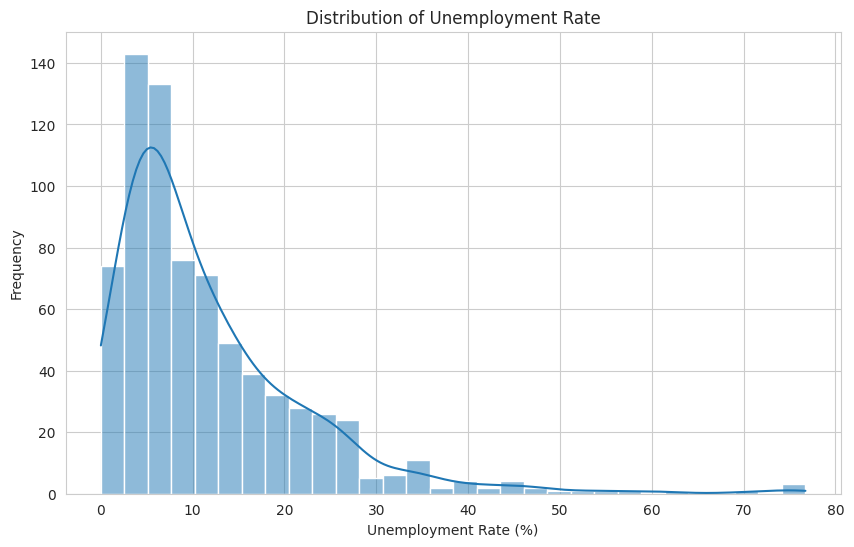


Average Unemployment Rate by Region:
              Region  Estimated_Unemployment_Rate_(%)
0     Andhra Pradesh                         7.477143
1              Assam                         6.428077
2              Bihar                        18.918214
3         Chandigarh                        15.991667
4       Chhattisgarh                         9.240357
5              Delhi                        16.495357
6                Goa                         9.274167
7            Gujarat                         6.663929
8            Haryana                        26.283214
9   Himachal Pradesh                        18.540357
10   Jammu & Kashmir                        16.188571
11         Jharkhand                        20.585000
12         Karnataka                         6.676071
13            Kerala                        10.123929
14    Madhya Pradesh                         7.406429
15       Maharashtra                         7.557500
16         Meghalaya                        

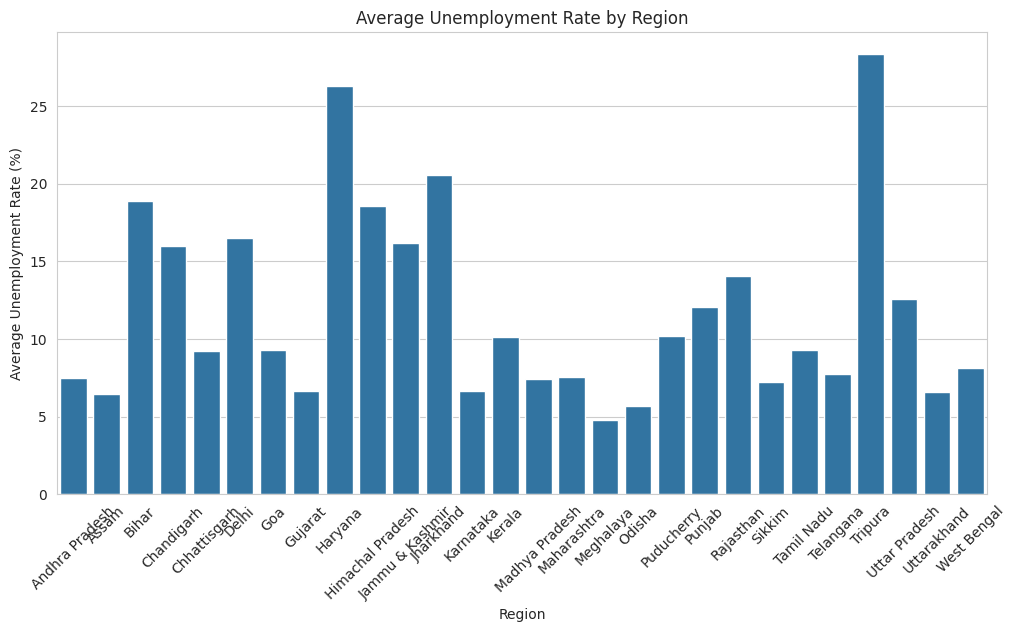


Average Unemployment Rate Over Time:
      Month  Estimated_Unemployment_Rate_(%)
0   2019-05                         8.874259
1   2019-06                         9.303333
2   2019-07                         9.033889
3   2019-08                         9.637925
4   2019-09                         9.051731
5   2019-10                         9.900909
6   2019-11                         9.868364
7   2019-12                         9.497358
8   2020-01                         9.950755
9   2020-02                         9.964717
10  2020-03                        10.700577
11  2020-04                        23.641569
12  2020-05                        24.875294
13  2020-06                        11.903600

Average Unemployment Rate Over Time:
      Month  Estimated_Unemployment_Rate_(%)
0   2019-05                         8.874259
1   2019-06                         9.303333
2   2019-07                         9.033889
3   2019-08                         9.637925
4   2019-09             

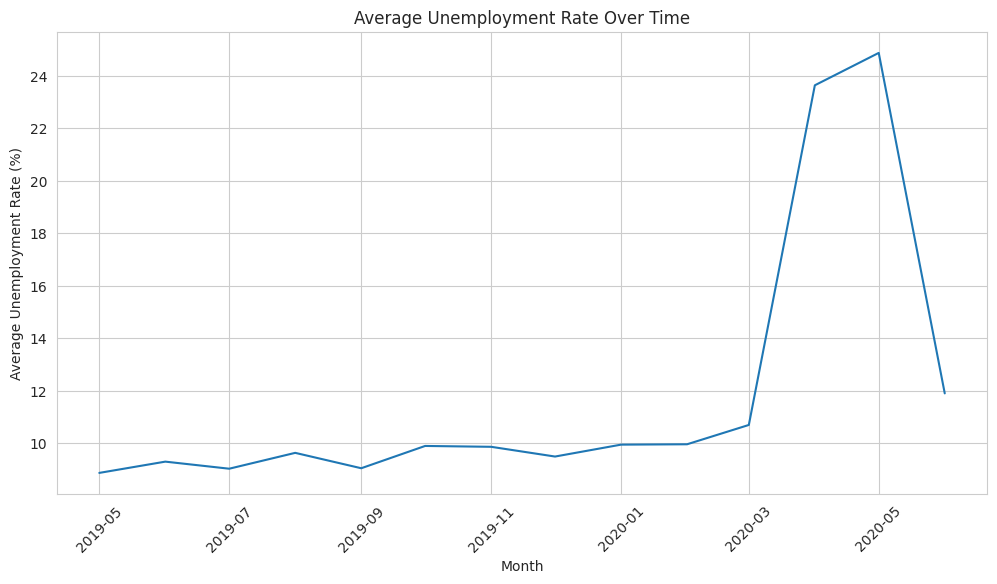


Conclusion:
The analysis shows a significant increase in the unemployment rate during the Covid-19 pandemic. Certain regions were more affected than others, and the unemployment rate fluctuated over time.


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from google.colab import files
uploaded = files.upload()


with zipfile.ZipFile('unemployment-in-india.zip', 'r') as zip_ref:
    zip_ref.extractall('unemployment_data')


df = pd.read_csv('unemployment_data/Unemployment in India.csv')

print("Column Names Before Cleaning:")
print(df.columns)

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
print("\nColumn Names After Cleaning:")
print(df.columns)


df['Date'] = pd.to_datetime(df['Date'])

print("\nMissing Values:")
print(df.isnull().sum())


df = df.dropna()


print("\nDuplicate Rows:")
print(df.duplicated().sum())


df = df.drop_duplicates()


print("\nFirst 5 Rows of the Dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate_(%)', data=df)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated_Unemployment_Rate_(%)'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


avg_unemployment_by_region = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()
print("\nAverage Unemployment Rate by Region:")
print(avg_unemployment_by_region)


plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=avg_unemployment_by_region)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
avg_unemployment_over_time = df.groupby('Month')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()
print("\nAverage Unemployment Rate Over Time:")
print(avg_unemployment_over_time)


df['Month'] = df['Date'].dt.to_period('M')
avg_unemployment_over_time = df.groupby('Month')['Estimated_Unemployment_Rate_(%)'].mean().reset_index()
print("\nAverage Unemployment Rate Over Time:")
print(avg_unemployment_over_time)


plt.figure(figsize=(12, 6))
avg_unemployment_over_time['Month'] = avg_unemployment_over_time['Month'].dt.to_timestamp()
sns.lineplot(x='Month', y='Estimated_Unemployment_Rate_(%)', data=avg_unemployment_over_time)
plt.title('Average Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

print("\nConclusion:")
print("The analysis shows a significant increase in the unemployment rate during the Covid-19 pandemic. Certain regions were more affected than others, and the unemployment rate fluctuated over time.")